<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
from IPython.display import clear_output
#Sólo para limpiar la pantalla después de que haga la instalación
drive.mount('/content/drive')
clear_output()

In [4]:
import pandas as pd
datos=pd.read_csv("/content/drive/MyDrive/COVID-19-ABRIL.csv")
municipios=pd.read_csv("/content/drive/MyDrive/AGEEML_20211271318711.csv",encoding='latin-1')
clear_output()

-----------------------------------------
# **STATES AND MUNICIPALITIES OF MEXICO**
-----------------------------------------


In [5]:
import time
%time
municipios.tail(3)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


,cve_ent,nom_ent,nom_abr,cve_mun,nom_mun,cve_cab,nom_cab,Pob_total,Total de viviendas habitadas,Pob_masculina,Pob_femenina
2467,32.0,Zacatecas,Zac.,57.0,Trancoso,1.0,Trancoso,20455.0,4671.0,10039.0,10416.0
2468,32.0,Zacatecas,Zac.,58.0,Santa María de la Paz,1.0,Santa María de la Paz,2767.0,860.0,1350.0,1417.0
2469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# VER NOMBRES DE LAS COLUMMNAS
municipios.columns

Index(['cve_ent', 'nom_ent', 'nom_abr', 'cve_mun', 'nom_mun', 'cve_cab',
       'nom_cab', 'Pob_total', 'Total de viviendas habitadas', 'Pob_masculina',
       'Pob_femenina'],
      dtype='object')

In [ ]:
# Ver las filas con valores faltantes
# municipios[municipios.isnull().any(axis=1)]
municipios.isna().sum()


cve_ent                          1
nom_ent                          1
nom_abr                          1
cve_mun                          1
nom_mun                          1
cve_cab                         17
nom_cab                         17
Pob_total                        1
Total de viviendas habitadas     1
Pob_masculina                    1
Pob_femenina                     1
dtype: int64

In [ ]:
municipios.dtypes

cve_ent                         float64
nom_ent                          object
nom_abr                          object
cve_mun                         float64
nom_mun                          object
cve_cab                         float64
nom_cab                          object
Pob_total                       float64
Total de viviendas habitadas    float64
Pob_masculina                   float64
Pob_femenina                    float64
dtype: object

In [ ]:
municipios=municipios.drop(2469)
muni_columnas=['cve_ent', 'nom_ent', 'nom_abr', 'cve_mun', 'nom_mun']
municipios=municipios[muni_columnas]
municipios.cve_ent=municipios.cve_ent.astype(int)
municipios.cve_mun=municipios.cve_mun.astype(int)
municipios.columns=['ENTIDAD_RES', 'nom_ent', 'nom_abr', 'MUNICIPIO_RES', 'nom_mun']
municipios.tail(3)

,ENTIDAD_RES,nom_ent,nom_abr,MUNICIPIO_RES,nom_mun
2466,32,Zacatecas,Zac.,56,Zacatecas
2467,32,Zacatecas,Zac.,57,Trancoso
2468,32,Zacatecas,Zac.,58,Santa María de la Paz


---------------------------------------------------------
**DAILY COVID-19 CASES DATA**
---------------------------------------------------------
---------------------------------------------------------

In [ ]:
print(datos.columns)
print("clasificación final:   ",datos.CLASIFICACION_FINAL.unique())
print("dimension de los datos:", datos.shape)

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')
clasificación final:    [7 3 6 5 1 2 4]
dimension de los datos: (12515177, 40)


# **Data Dictionary**
$$\tiny{ \begin{matrix}
\text{NUMBER} &	\text{DEFINITION}\\ \hline
1 &\text{ CASO DE COVID-19 CONFIRMADO POR ASOCIACIÓN CLÍNICA EPIDEMIOLÓGICA }\\ \hline
2 	& \text{CASO DE COVID-19 CONFIRMADO POR COMITÉ DE  DICTAMINACIÓN} \\ \hline
3	& \text{CASO DE SARS-COV-2  CONFIRMADO} 	& \\ \hline
4	& \text{INVÁLIDO POR LABORATORIO} 	\\ \hline
5 & \text{NO REALIZADO POR LABORATORIO} 	 \\ \hline
6	& \text{CASO SOSPECHOSO}  \\ \hline
7 	& \text{NEGATIVO A SARS-COV-2}	\\ \hline
\end{matrix}
}
$$

In [ ]:
datos.head(4)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,INDIGENA,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-01-05,zz7202,1,12,16,2,16,16,112,1,2021-01-13,2021-01-13,9999-99-99,97,2,41,1,97,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,2,97,7,99,México,97,97
1,2022-01-05,z58ed3,2,12,18,1,18,18,17,1,2020-07-03,2020-06-30,9999-99-99,97,2,46,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
2,2022-01-05,z3be8c,2,12,7,1,7,7,101,1,2020-08-18,2020-08-14,9999-99-99,97,2,40,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,97,7,99,México,97,97
3,2022-01-05,z526b3,2,12,9,1,9,9,12,1,2020-12-21,2020-12-18,9999-99-99,97,2,62,1,2,2,2,2,2,2,2,1,2,2,1,2,2,1,2,97,1,1,3,99,México,97,97


In [ ]:
nombre_columnas=['SEXO','ENTIDAD_RES', 'MUNICIPIO_RES','FECHA_INGRESO','NEUMONIA','EDAD','DIABETES', 'EPOC', 'ASMA','HIPERTENSION', 'OTRA_COM',
                 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO','CLASIFICACION_FINAL']
DATA=datos[nombre_columnas]

In [ ]:
uno=DATA[DATA.CLASIFICACION_FINAL<4].index
cero=DATA[DATA.CLASIFICACION_FINAL>=4].index
DATA.loc[uno,"CLASIFICACION_FINAL"]=1
DATA.loc[cero,"CLASIFICACION_FINAL"]=0
clear_output()
DATA.head(3)


,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL
0,2,16,112,2021-01-13,2,41,2,2,2,2,2,2,2,2,1,0
1,1,18,17,2020-07-03,2,46,2,2,2,2,2,2,2,2,2,0
2,1,7,101,2020-08-18,2,40,2,2,2,2,2,2,2,2,2,0


In [ ]:
from datetime import datetime, timedelta, date
import numpy as np

DATA["FECHA_INGRESO"]=DATA["FECHA_INGRESO"].astype("datetime64")
DIAS=(datetime.today()-DATA.FECHA_INGRESO)/timedelta(1)
DATA["FECHA_INGRESO"]=DIAS.astype(int)
clear_output()

In [ ]:
DATA["FECHA_INGRESO"].max()

843

In [ ]:
DATA.head(3)

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL
0,2,16,112,378,2,41,2,2,2,2,2,2,2,2,1,0
1,1,18,17,572,2,46,2,2,2,2,2,2,2,2,2,0
2,1,7,101,526,2,40,2,2,2,2,2,2,2,2,2,0


# Función de densidad de los casos diarios registrados

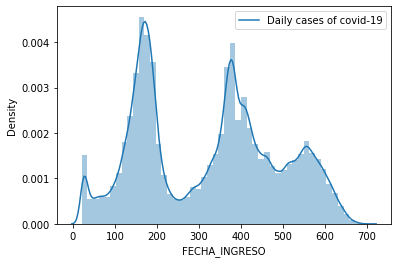

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
posit=DATA.loc[uno,"FECHA_INGRESO"]
sns.distplot(posit)
clear_output()
plt.legend(labels=["Daily cases of covid-19"])


# Función de densidad de casos por edad

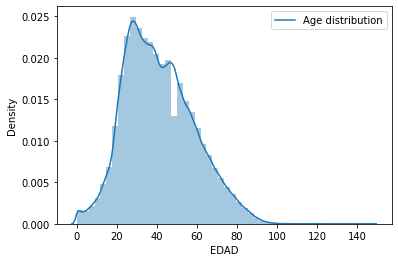

In [ ]:
posit_2=DATA.loc[uno,"EDAD"]
sns.distplot(posit_2)
clear_output()
plt.legend(labels=["Age distribution"])

# **Cleaning the data to apply XGBOOST**

In [ ]:
#ELIMINA FILAS DUPLICADAS
DATA= DATA.drop_duplicates()
DATA.shape

(9243959, 16)

In [ ]:
#ELIMINA FILAS DUPLICADAS SIN CONSIDERAR LA CLASIFICACIÓN
COLUMNAS=['SEXO','ENTIDAD_RES', 'MUNICIPIO_RES','FECHA_INGRESO','NEUMONIA','EDAD','DIABETES', 'EPOC', 'ASMA','HIPERTENSION', 'OTRA_COM',
                 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
DATA = DATA.drop_duplicates(subset=COLUMNAS, keep=False)

DATA.shape

(7629133, 16)

In [ ]:
#--------------------------------------------
#1:Si, 2:No, sólo cambia 2 a 0
#1:Mujer , 2:Hombre, pasa a 0
#--------------------------------------------
col_binarias=['SEXO','NEUMONIA','DIABETES', 'EPOC', 'ASMA','HIPERTENSION', 'OTRA_COM','CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
DATA[col_binarias]=DATA[col_binarias].replace({2: 0})
DATA.head(3)


,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL
0,0,16,112,465,0,41,0,0,0,0,0,0,0,0,1,0
1,1,18,17,659,0,46,0,0,0,0,0,0,0,0,0,0
2,1,7,101,613,0,40,0,0,0,0,0,0,0,0,0,0


In [ ]:
#COMBINAR DATOS
datos=pd.merge(DATA, municipios, how="left")
datos.head(3)

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,nom_ent,nom_abr,nom_mun
0,0,16,112,378,0,41,0,0,0,0,0,0,0,0,1,0,Michoacán de Ocampo,Mich.,Zitácuaro
1,1,18,17,572,0,46,0,0,0,0,0,0,0,0,0,0,Nayarit,Nay.,Tepic
2,1,7,101,526,0,40,0,0,0,0,0,0,0,0,0,0,Chiapas,Chis.,Tuxtla Gutiérrez


In [ ]:
datos.isna().sum()
#para ver las filas con valores faltantes
# datos[datos.isnull().any(axis=1)]

SEXO                      0
ENTIDAD_RES               0
MUNICIPIO_RES             0
FECHA_INGRESO             0
NEUMONIA                  0
EDAD                      0
DIABETES                  0
EPOC                      0
ASMA                      0
HIPERTENSION              0
OTRA_COM                  0
CARDIOVASCULAR            0
OBESIDAD                  0
RENAL_CRONICA             0
TABAQUISMO                0
CLASIFICACION_FINAL       0
nom_ent                6943
nom_abr                6943
nom_mun                6943
dtype: int64

In [ ]:
#eliminar datos faltantes: Sólo consideramos los casos de personas de México
datos= datos.dropna()
datos.shape

(7622190, 19)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

positivos=datos[datos.CLASIFICACION_FINAL==1]

In [ ]:
#PERSONAS SIN NINGUNA COMORBILIDAD/ ALMENOS UNA COMMORBILIDAD
comorbilidades=['NEUMONIA','DIABETES', 'EPOC', 'ASMA','HIPERTENSION', 'OTRA_COM',
                'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']

sin_Conmor=positivos[(positivos.NEUMONIA==0) &  (positivos.DIABETES==0) &
                     (positivos.EPOC==0) &  (positivos.ASMA==0) &  (positivos.HIPERTENSION==0) &
                     (positivos.OTRA_COM==0) & (positivos.CARDIOVASCULAR==0) & (positivos.OBESIDAD==0)   &
                     (positivos.RENAL_CRONICA==0) &  (positivos.TABAQUISMO==0)]



In [ ]:
#con almenos una comorbilidad presente
con_Conmor=positivos[(positivos.NEUMONIA==1) |  (positivos.DIABETES==1) |
                     (positivos.EPOC==1)  | (positivos.ASMA==1) | (positivos.HIPERTENSION==1) |
                     (positivos.OTRA_COM==1) | (positivos.CARDIOVASCULAR==1) | (positivos.OBESIDAD==1) |
                     (positivos.RENAL_CRONICA==1)  | (positivos.TABAQUISMO==1)]

con_Conmor.head(2)

,SEXO,ENTIDAD_RES,MUNICIPIO_RES,FECHA_INGRESO,NEUMONIA,EDAD,DIABETES,EPOC,ASMA,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,CLASIFICACION_FINAL,nom_ent,nom_abr,nom_mun
3,1,9,12,401,0,62,0,0,0,1,0,0,1,0,0,1,Ciudad de México,CDMX,Tlalpan
4,1,9,5,644,0,45,0,0,0,0,0,0,1,0,0,1,Ciudad de México,CDMX,Gustavo A. Madero


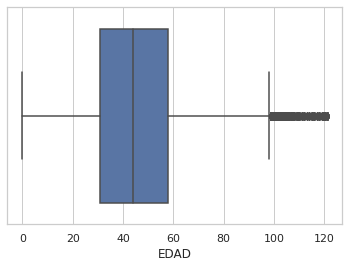

In [ ]:
#EDAD DE TODOS LOS CASOS POSITIVOS
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=positivos["EDAD"])
#Existen algunos valores atipicos dentro del conjunto de edad

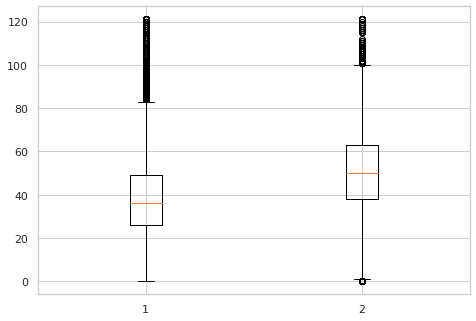

In [ ]:
#Personas con alguna commorbilidad VS sin comorbilidad
fig = plt.figure(figsize =(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([sin_Conmor.EDAD,con_Conmor.EDAD])
clear_output()
plt.show()



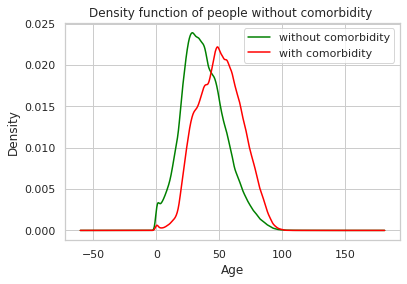

In [ ]:
sin_Conmor.EDAD.plot.density(color='green')
con_Conmor.EDAD.plot.density(color='red')
plt.title('Density function of people without comorbidity ')
plt.xlabel("Age")
plt.legend(labels=["without comorbidity", "with comorbidity"])
plt.show()